# Finetune SegFormer on the SceneParse150 dataset for Semantic Segmentation

## Introduction

Image segmentation models separate areas corresponding to different areas of interest in an image. These models work by assigning a label to each pixel. There are several types of segmentation: semantic segmentation, instance segmentation, and panoptic segmentation.

## Setup

In [41]:
import torch

torch.cuda.is_available()

True

In [42]:
!nvidia-smi

Mon Sep  9 09:14:35 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0              32W /  70W |    933MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
# uncomment to install the necessary libraries
!pip install -q datasets transformers evaluate accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [2]:
from huggingface_hub import notebook_login

notebook_login()

## Inference Pipeline using Huggingface checkpoint


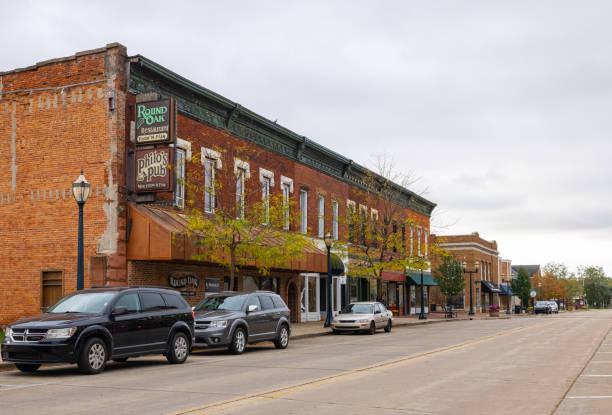

In [3]:
from transformers import pipeline
from PIL import Image
import requests

url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/segmentation_input.jpg"
image = Image.open(requests.get(url, stream=True).raw)
image

In [4]:
semantic_segmentation = pipeline("image-segmentation", "nvidia/segformer-b1-finetuned-cityscapes-1024-1024")
results = semantic_segmentation(image)
results

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/54.8M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/273 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'score': None,
  'label': 'road',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'sidewalk',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'building',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'wall',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'pole',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'traffic sign',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'vegetation',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'terrain',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'sky',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=612x415>}]

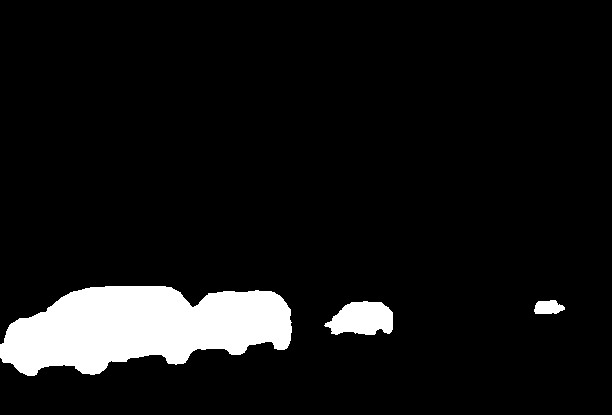

In [5]:
results[-1]["mask"]

In [6]:
instance_segmentation = pipeline("image-segmentation", "facebook/mask2former-swin-large-cityscapes-instance")
results = instance_segmentation(image)
results

config.json:   0%|          | 0.00/76.9k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/866M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/536 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/utils/deprecation.py:165: UserWarning: The following named arguments are not valid for `Mask2FormerImageProcessor.__init__` and were ignored: '_max_size'
  return func(*args, **kwargs)
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
`label_ids_to_fuse` unset. No instance will be fused.


[{'score': 0.999944,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.999945,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.999652,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.903529,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=612x415>}]

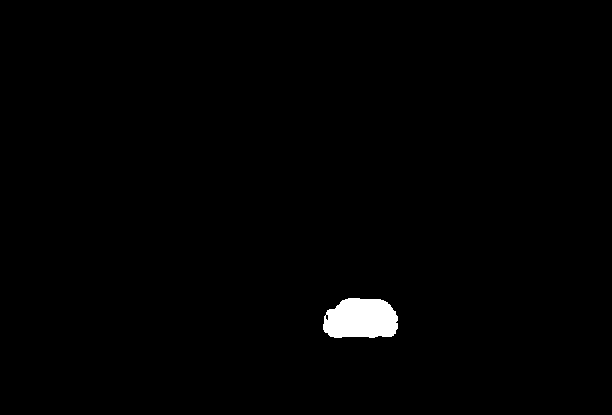

In [7]:
results[2]["mask"]

In [8]:
panoptic_segmentation = pipeline("image-segmentation", "facebook/mask2former-swin-large-cityscapes-panoptic")
results = panoptic_segmentation(image)
results

config.json:   0%|          | 0.00/77.3k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/866M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
`label_ids_to_fuse` unset. No instance will be fused.


[{'score': 0.999981,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.999958,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.99997,
  'label': 'vegetation',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.999575,
  'label': 'pole',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.999958,
  'label': 'building',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.999634,
  'label': 'road',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.996092,
  'label': 'sidewalk',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.999221,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.99987,
  'label': 'sky',
  'mask': <PIL.Image.Image image mode=L size=612x415>}]

## Load SceneParse150 dataset

In [9]:
from datasets import load_dataset

ds = load_dataset("scene_parse_150", split="train[:50]")

The repository for scene_parse_150 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/scene_parse_150.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/20210 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3352 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [10]:
# Split train dataset into train and test set
ds = ds.train_test_split(test_size=0.2)
train_ds = ds["train"]
test_ds = ds["test"]

In [ ]:
# Let's look at an example
train_ds[0]

- `image:` a PIL image of the scene.
- `annotation:` a PIL image of the segmentation map, which is also the model’s target.
- `scene_category:` a category id that describes the image scene like “kitchen” or “office”. In this guide, you’ll only need image and annotation, both of which are PIL images.

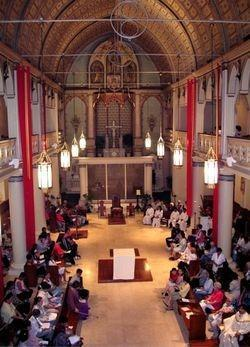

In [11]:
# view the image
train_ds[0]["image"]

In [12]:
# Create a dictionary to map label id to a label class
import json
from pathlib import Path
from huggingface_hub import hf_hub_download

repo_id = "huggingface/label-files"
filename = "ade20k-id2label.json"
id2label = json.loads(Path(hf_hub_download(repo_id, filename, repo_type="dataset")).read_text())
id2label = {int(k): v for k, v in id2label.items()}
label2id = {v: k for k, v in id2label.items()}
num_labels = len(id2label)

ade20k-id2label.json:   0%|          | 0.00/2.81k [00:00<?, ?B/s]

## Data Preprocessing

In [13]:
from datasets import Dataset, DatasetDict, Image

In [14]:
# Load a SegFormer image processor to prepare the images and annotations for the model
from transformers import AutoImageProcessor

checkpoint = "nvidia/mit-b0"
image_processor = AutoImageProcessor.from_pretrained(checkpoint, do_reduce_labels=True)

preprocessor_config.json:   0%|          | 0.00/272 [00:00<?, ?B/s]

In [15]:
# Randomly Change the color properties of images
from torchvision.transforms import ColorJitter

jitter = ColorJitter(brightness=0.25, contrast=0.25, saturation=0.25, hue=0.1)

In [16]:
# Define preprocessing functions to prepare the images and annotations for the model
def train_transforms(example_batch):
    images = [jitter(x) for x in example_batch["image"]]
    labels = [x for x in example_batch["annotation"]]
    inputs = image_processor(images, labels)
    return inputs


def val_transforms(example_batch):
    images = [x for x in example_batch["image"]]
    labels = [x for x in example_batch["annotation"]]
    inputs = image_processor(images, labels)
    return inputs

In [17]:
# Apply jitter over entire dataset
train_ds.set_transform(train_transforms)
test_ds.set_transform(val_transforms)

## Evaluation Metric

In [18]:
# Load the IoU (mean intersection over union) metric
import evaluate

metric = evaluate.load("mean_iou")

In [19]:
# Define a function to compute evaluation metrics
import numpy as np
import torch
from torch import nn

def compute_metrics(eval_pred):
    with torch.no_grad():
        logits, labels = eval_pred
        logits_tensor = torch.from_numpy(logits)
        logits_tensor = nn.functional.interpolate(
            logits_tensor,
            size=labels.shape[-2:],
            mode="bilinear",
            align_corners=False,
        ).argmax(dim=1)

        pred_labels = logits_tensor.detach().cpu().numpy()
        metrics = metric.compute(
            predictions=pred_labels,
            references=labels,
            num_labels=num_labels,
            ignore_index=255,
            reduce_labels=False,
        )
        for key, value in metrics.items():
            if isinstance(value, np.ndarray):
                metrics[key] = value.tolist()
        return metrics

## Train the Model

In [20]:
# Load SegFormer Model
from transformers import AutoModelForSemanticSegmentation, TrainingArguments, Trainer

model = AutoModelForSemanticSegmentation.from_pretrained(checkpoint, id2label=id2label, label2id=label2id)

config.json:   0%|          | 0.00/70.0k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/14.4M [00:00<?, ?B/s]

Some weights of SegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/mit-b0 and are newly initialized: ['decode_head.batch_norm.bias', 'decode_head.batch_norm.num_batches_tracked', 'decode_head.batch_norm.running_mean', 'decode_head.batch_norm.running_var', 'decode_head.batch_norm.weight', 'decode_head.classifier.bias', 'decode_head.classifier.weight', 'decode_head.linear_c.0.proj.bias', 'decode_head.linear_c.0.proj.weight', 'decode_head.linear_c.1.proj.bias', 'decode_head.linear_c.1.proj.weight', 'decode_head.linear_c.2.proj.bias', 'decode_head.linear_c.2.proj.weight', 'decode_head.linear_c.3.proj.bias', 'decode_head.linear_c.3.proj.weight', 'decode_head.linear_fuse.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [21]:
# Define the training hyperparameters
training_args = TrainingArguments(
    output_dir="segformer-b0-scene-parse-150",
    learning_rate=6e-5,
    num_train_epochs=50,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    save_total_limit=3,
    eval_strategy="steps",
    save_strategy="steps",
    save_steps=20,
    eval_steps=20,
    logging_steps=1,
    eval_accumulation_steps=5,
    remove_unused_columns=False,
    push_to_hub=True,
)

# Define the trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics,
)

# Fine-tuning the model
trainer.train()

Step,Training Loss,Validation Loss,Mean Iou,Mean Accuracy,Overall Accuracy,Per Category Iou,Per Category Accuracy
20,4.795900,4.858786,0.011489,0.048899,0.309659,"[0.20083063804763304, 0.5973327902189011, 0.2397940814325185, 0.09686899272082714, 0.0, 0.005743913366469331, 0.0013909938339527062, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.033970403211311485, 0.0, nan, 0.0, 0.10884345482359226, 0.0, 0.0, 0.0, 0.0016786807544188801, 0.0, nan, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, nan, 0.0, 0.0, nan, 0.0, 0.0, nan, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.00035072802635774256, nan, nan, 0.0, nan, 0.0, 0.0, nan, 0.0, nan, 0.0, nan, nan, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, nan, nan, 0.0, 0.0, 0.0, 0.0, nan, nan, nan, 0.0, 0.0, 0.0, nan, 0.0, 0.0, nan, nan, nan, 0.0, 0.0, 0.0, 0.0, nan, 0.0, nan, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, nan, nan, nan, 0.0, 0.0]","[0.2518668067924111, 0.691022193722021, 0.28813587680069985, 0.3804701070207878, 0.0, 0.10755772264448588, 0.0014150096621928425, nan, nan, nan, nan, 0.0, 0.0, nan, 0.0, nan, 0.03457129694867487, 0.0, nan, 0.0, 0.14313083739123494, nan, 0.0, nan, 0.0037321624588364435, nan, nan, nan, nan, 0.0, nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, 0.0, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, 0.0, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, 0.0, 0.005177282711013492, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, 0.0, 0.0]"
40,4.600900,4.363277,0.037142,0.121878,0.543152,"[0.45250724846003093, 0.7282372081080148, 0.6819898343028057, 0.11908062028429697, 0.0, 0.24599696612169222, 0.0183525583377952, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08865959119496855, 0.0, nan, 0.0, 0.29236402320604643, nan, 0.0, 0.0, 0.04704008049639443, 0.0, nan, nan, 0.0, 0.0, nan, 0.0, 0.0, 0.0, nan, 0.0, nan, nan, nan, nan, 0.0, 0.0, nan, 0.0, 0.0, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, 0.0, nan, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.0, nan, nan, 0.0, nan, 0.0, 0.0, 0.0, nan, nan, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, nan, nan, 0.0, nan, 0.0, nan, nan, nan, 0.0, 0.0, 0.0, 0.0, nan, nan, nan, nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, 0.0, nan, nan, nan, nan, 0.0, nan, 0.0, 0.0, nan, 0.0, nan, 0.0, nan, nan, nan, nan, 0.0, 0.0]","[0.5949351918432066, 0.9230992511410201, 0.8883428661572402, 0.9603714910068919, 0.0, 0.8372293130646781, 0.01864064034467101, nan, nan, nan, nan, 0.0, 0.0, nan, 0.0, nan, 0.09168202265459867, 0.0, nan, 0.0, 0.37734493494052845, nan, 0.0, nan, 0.061580680570801315, nan, nan, nan, nan, 0.0, nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, 0.0, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, 0.0, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, 0.0, 0.0]"
60,4.058900,3.655044,0.044744,0.098420,0.557780,"[0.5158986719756568, 0.6802848665706249, 0.6867605352256968, 0.11960851696519995, 0.0, 0.08552951811417843, 0.0086957667

/usr/local/lib/python3.10/dist-packages/datasets/features/image.py:348: UserWarning: Downcasting array dtype int64 to int32 to be compatible with 'Pillow'
  warnings.warn(f"Downcasting array dtype {dtype} to {dest_dtype} to be compatible with 'Pillow'")
/root/.cache/huggingface/modules/evaluate_modules/metrics/evaluate-metric--mean_iou/9e450724f21f05592bfb0255fe2fa576df8171fa060d11121d8aecfff0db80d0/mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
/root/.cache/huggingface/modules/evaluate_modules/metrics/evaluate-metric--mean_iou/9e450724f21f05592bfb0255fe2fa576df8171fa060d11121d8aecfff0db80d0/mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label
Trainer is attempting to log a value of "[0.20083063804763304, 0.5973327902189011, 0.2397940814325185, 0.09686899272082714, 0.0, 0.005743913366469331, 0.0013909938339527062, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

TrainOutput(global_step=1000, training_loss=2.2954450960159303, metrics={'train_runtime': 525.0199, 'train_samples_per_second': 3.809, 'train_steps_per_second': 1.905, 'total_flos': 3.5414863773696e+16, 'train_loss': 2.2954450960159303, 'epoch': 50.0})

In [22]:
# Share the model to the Hugging Face Hub
trainer.push_to_hub()

CommitInfo(commit_url='https://huggingface.co/ashaduzzaman/segformer-b0-scene-parse-150/commit/b70000fe08daf606ed42cac80dc02c79d8782e05', commit_message='End of training', commit_description='', oid='b70000fe08daf606ed42cac80dc02c79d8782e05', pr_url=None, pr_revision=None, pr_num=None)

## Model Inference

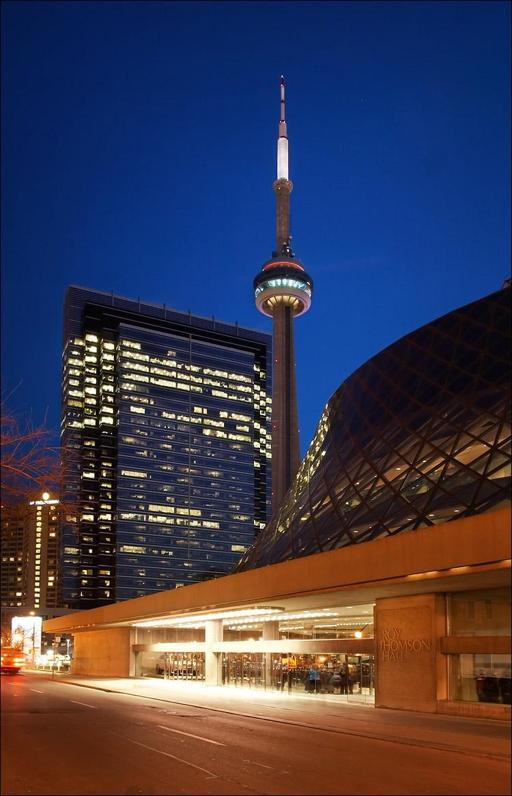

In [34]:
# Reload the dataset and load an image for inference
from datasets import load_dataset

ds = load_dataset("scene_parse_150", split="train[:50]")
ds = ds.train_test_split(test_size=0.2)
test_ds = ds["test"]
image = ds["test"][1]["image"]
image

In [35]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # use GPU if available, otherwise use a CPU
encoding = image_processor(image, return_tensors="pt")
pixel_values = encoding.pixel_values.to(device)

In [ ]:
pixel_values

In [36]:
# Pass your input to the model and return the logits
outputs = model(pixel_values=pixel_values)
logits = outputs.logits.cpu()

In [ ]:
logits

In [37]:
# Rescale the logits to the original image size
upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.size[::-1],
    mode="bilinear",
    align_corners=False,
)

pred_seg = upsampled_logits.argmax(dim=1)[0]

In [ ]:
pred_seg

In [38]:
# load the dataset color palette to visualize the results
def ade_palette():
  return np.asarray([
      [0, 0, 0],
      [120, 120, 120],
      [180, 120, 120],
      [6, 230, 230],
      [80, 50, 50],
      [4, 200, 3],
      [120, 120, 80],
      [140, 140, 140],
      [204, 5, 255],
      [230, 230, 230],
      [4, 250, 7],
      [224, 5, 255],
      [235, 255, 7],
      [150, 5, 61],
      [120, 120, 70],
      [8, 255, 51],
      [255, 6, 82],
      [143, 255, 140],
      [204, 255, 4],
      [255, 51, 7],
      [204, 70, 3],
      [0, 102, 200],
      [61, 230, 250],
      [255, 6, 51],
      [11, 102, 255],
      [255, 7, 71],
      [255, 9, 224],
      [9, 7, 230],
      [220, 220, 220],
      [255, 9, 92],
      [112, 9, 255],
      [8, 255, 214],
      [7, 255, 224],
      [255, 184, 6],
      [10, 255, 71],
      [255, 41, 10],
      [7, 255, 255],
      [224, 255, 8],
      [102, 8, 255],
      [255, 61, 6],
      [255, 194, 7],
      [255, 122, 8],
      [0, 255, 20],
      [255, 8, 41],
      [255, 5, 153],
      [6, 51, 255],
      [235, 12, 255],
      [160, 150, 20],
      [0, 163, 255],
      [140, 140, 140],
      [250, 10, 15],
      [20, 255, 0],
      [31, 255, 0],
      [255, 31, 0],
      [255, 224, 0],
      [153, 255, 0],
      [0, 0, 255],
      [255, 71, 0],
      [0, 235, 255],
      [0, 173, 255],
      [31, 0, 255],
      [11, 200, 200],
      [255, 82, 0],
      [0, 255, 245],
      [0, 61, 255],
      [0, 255, 112],
      [0, 255, 133],
      [255, 0, 0],
      [255, 163, 0],
      [255, 102, 0],
      [194, 255, 0],
      [0, 143, 255],
      [51, 255, 0],
      [0, 82, 255],
      [0, 255, 41],
      [0, 255, 173],
      [10, 0, 255],
      [173, 255, 0],
      [0, 255, 153],
      [255, 92, 0],
      [255, 0, 255],
      [255, 0, 245],
      [255, 0, 102],
      [255, 173, 0],
      [255, 0, 20],
      [255, 184, 184],
      [0, 31, 255],
      [0, 255, 61],
      [0, 71, 255],
      [255, 0, 204],
      [0, 255, 194],
      [0, 255, 82],
      [0, 10, 255],
      [0, 112, 255],
      [51, 0, 255],
      [0, 194, 255],
      [0, 122, 255],
      [0, 255, 163],
      [255, 153, 0],
      [0, 255, 10],
      [255, 112, 0],
      [143, 255, 0],
      [82, 0, 255],
      [163, 255, 0],
      [255, 235, 0],
      [8, 184, 170],
      [133, 0, 255],
      [0, 255, 92],
      [184, 0, 255],
      [255, 0, 31],
      [0, 184, 255],
      [0, 214, 255],
      [255, 0, 112],
      [92, 255, 0],
      [0, 224, 255],
      [112, 224, 255],
      [70, 184, 160],
      [163, 0, 255],
      [153, 0, 255],
      [71, 255, 0],
      [255, 0, 163],
      [255, 204, 0],
      [255, 0, 143],
      [0, 255, 235],
      [133, 255, 0],
      [255, 0, 235],
      [245, 0, 255],
      [255, 0, 122],
      [255, 245, 0],
      [10, 190, 212],
      [214, 255, 0],
      [0, 204, 255],
      [20, 0, 255],
      [255, 255, 0],
      [0, 153, 255],
      [0, 41, 255],
      [0, 255, 204],
      [41, 0, 255],
      [41, 255, 0],
      [173, 0, 255],
      [0, 245, 255],
      [71, 0, 255],
      [122, 0, 255],
      [0, 255, 184],
      [0, 92, 255],
      [184, 255, 0],
      [0, 133, 255],
      [255, 214, 0],
      [25, 194, 194],
      [102, 255, 0],
      [92, 0, 255],
  ])

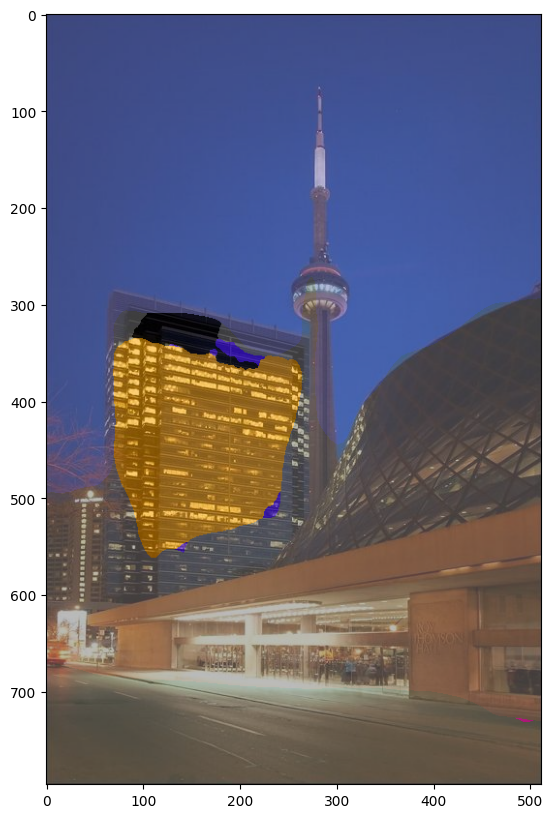

In [39]:
# Combine and plot our image and the predicted segmentation map
import matplotlib.pyplot as plt
import numpy as np

color_seg = np.zeros((pred_seg.shape[0], pred_seg.shape[1], 3), dtype=np.uint8)
palette = np.array(ade_palette())
for label, color in enumerate(palette):
    color_seg[pred_seg == label, :] = color
color_seg = color_seg[..., ::-1]  # convert to BGR

img = np.array(image) * 0.5 + color_seg * 0.5  # plot the image with the segmentation map
img = img.astype(np.uint8)

plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.show()

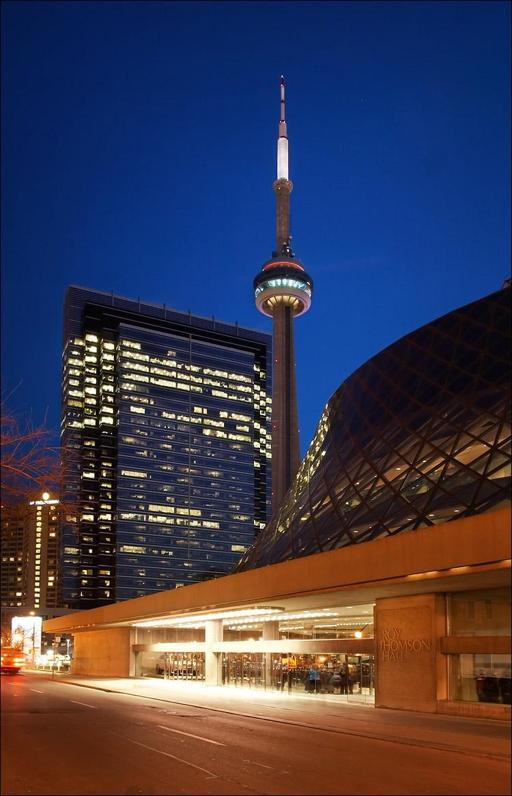

In [40]:
image